In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
data = pd.ExcelFile('jumlah-anggaran-apbn-2024.xlsx')
anggaran_kabkota = data.parse(' Anggaran-kabkota')

In [8]:
print(anggaran_kabkota.head())  # Menampilkan sampel data
anggaran_kabkota.info()

           LOKASI                    KAB_KOTA             PAGU
0  01 DKI JAKARTA           01 00 DKI JAKARTA   52049668124000
1  01 DKI JAKARTA    01 51 KOTA JAKARTA PUSAT  329474392308000
2  01 DKI JAKARTA    01 52 KOTA JAKARTA UTARA    4415607228000
3  01 DKI JAKARTA    01 53 KOTA JAKARTA BARAT    4997506878000
4  01 DKI JAKARTA  01 54 KOTA JAKARTA SELATAN  170023682638000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOKASI    592 non-null    object
 1   KAB_KOTA  592 non-null    object
 2   PAGU      592 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.0+ KB


In [9]:
scaler = StandardScaler()
pagu_normalized = scaler.fit_transform(anggaran_kabkota[['PAGU']])

In [10]:
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pagu_normalized)
    inertia.append(kmeans.inertia_)

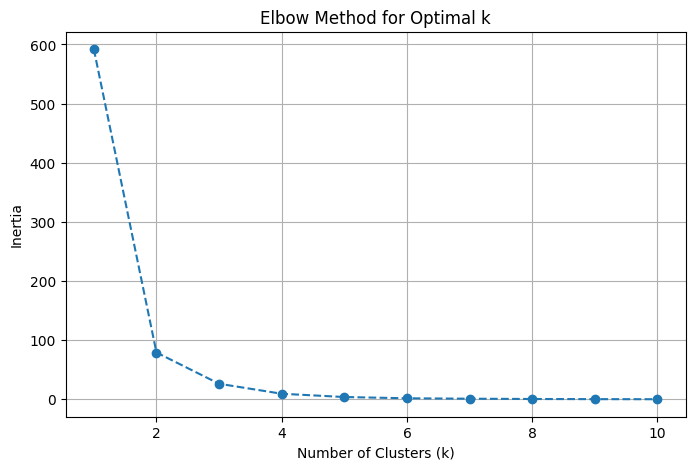

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [12]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
anggaran_kabkota['Cluster'] = kmeans.fit_predict(pagu_normalized)

In [13]:
print(anggaran_kabkota.groupby('Cluster')['PAGU'].describe())

         count          mean           std           min           25%  \
Cluster                                                                  
0        590.0  9.913308e+11  3.283229e+12  1.750000e+09  1.450450e+11   
1          1.0  3.294744e+14           NaN  3.294744e+14  3.294744e+14   
2          1.0  1.700237e+14           NaN  1.700237e+14  1.700237e+14   

                  50%           75%           max  
Cluster                                            
0        2.678577e+11  5.389246e+11  5.204967e+13  
1        3.294744e+14  3.294744e+14  3.294744e+14  
2        1.700237e+14  1.700237e+14  1.700237e+14  


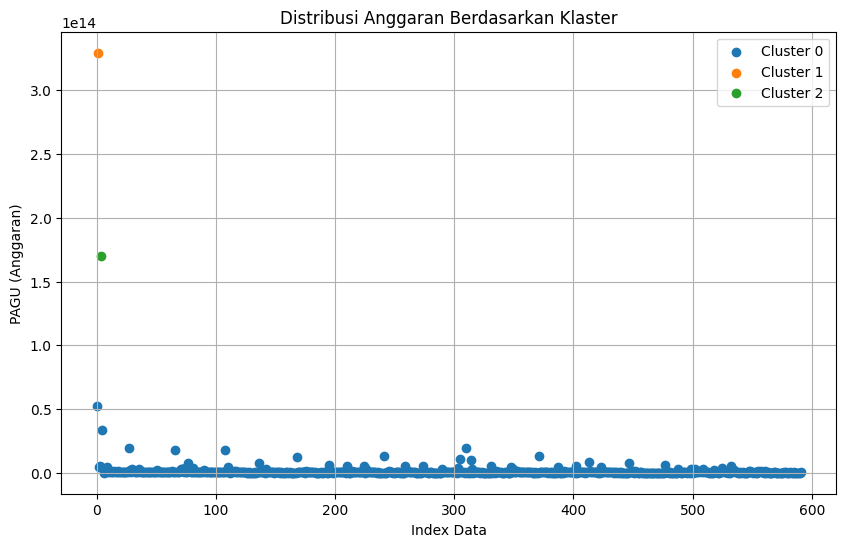

In [14]:
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = anggaran_kabkota[anggaran_kabkota['Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['PAGU'], label=f'Cluster {cluster}')
plt.xlabel('Index Data')
plt.ylabel('PAGU (Anggaran)')
plt.title('Distribusi Anggaran Berdasarkan Klaster')
plt.legend()
plt.grid(True)
plt.show()